# NCBI Document Recommender

Author: Andrew Y

Github: https://github.com/awyeh64

## Table of Contents:
00. [Overview](#0)
01. [Imports](#1)
02. [Data Scraping and Extraction](#2)
03. [Data Preprocessing and Cleaning](#3)
04. [Exploratory Data Analysis](#4)
05. [Feature Preprocessing / Engineering](#5)
06. [Reference Number Inputing w/ Supervised Regression Modeling](#6)
07. [Grouping Similar Documents w/ Unsupervised Clustering Modeling](#7)
08. [Finding Results to Return](#8)
09. [Example Showcase](#9)

## 00 - Overview<a id="0"></a>

  For students, finding relevant research papers for their studies is a problem faced in every assignment outside of their expertise.  The goal of this project is to create a useful tool to find papers useful for their desired topic.  Scope-wise, the model will work with documents from the National Center for Biotechnology Information, or the NCBI, as they have the an extensive database of documents relating to biology, mainly bio-informatics, bio-medicine, and bio-technology.
  
  The outcome of the project is for the user to be able to input a keyword, and receive a list of documents that would be relevant to their work.  To help keep the scope manageable, the project will be working with data from the National Center of Biotechnology Information, or NCBI for short.  They are a research institute that is a branch of the National Institutes of Health, and is known for housing a multitude of databases containing tools and services relating to biotechnology and biomedicine.  They also house databases dedicated to bio-related literature, which is what this project will be pulling the data from.
    While their database does have an existing search feature, it is quite limited in its functionality, and does not have a way to return documents based on their relevancy.  The potential contribution of this project is to provide an additional way for documents to be acquired in a way that would ease the burden of any aspiring researcher attempting to expand their scope of knowledge.

### 00a - Gather data, determine the method of data collection and provenance of the data

  The source of the data will be the NCBI online database, specifically their database dedicated to literature.  This contains an enormous collection of articles and texts published by experts in their field.  To pull the data, NCBI has a convenient tool named Entrez used for data extraction, which also has their own Python library for easy of their API.  As our problem is based around recommending documents, using this tool greatly eases our method of data collection.

### 00b - Identify an Unsupervised Learning Problem

We have two main modeling portions to focus on. The first will be a supervised regression model for predicting and imputing the missing reference numbers.  The reference number is a metric our model will use to determine the relevancy of a document, as it is the number of times a document has been referenced by other articles.  A high reference number correlates to a high quality document, though unfortunately a significant portion of documents are missing the number.  Thus we will use a supervised regression model to impute their potential numbers in order to ensure that we can include that portion of documents.


The second model is the unsupervised clustering model for grouping up the documents itself.  Once the reference numbers are filled in, we can use a clustering model on the data to group the documents into distinct clusters, and choose one document from each with the highest reference number in their respective group.

## 00c - Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

This data set consists of individual documents as its rows, and document's features as its columns. The document features mostly consist of metadata about the document, such as publication date, the journal that it belongs to, or the author. From these features, there are three main ones that will have the most focus: document abstract, document reference number, and document author.

Document abstract is our biggest priority as it will be where the bulk of the modeling will utilize. The abstract is used over the actual text data as it is more feasible in regards to performance, and also helps combat over-fitting. This is due to it acting as a summary for the actual article text, and thus can be treated as a form of dimension reduction. As the abstract data is still also in text form, we will undergo the typical text pre-processing steps such as but not limited to, removing accents, word lemmatizing, and removing stop words. Once the pre-processing has been completed, it will be fed through both a Count Vectorizer and a TF-IDF Vectorizer model to create a document-term matrix. This is done as it is the most optimal format to feed text data into a machine learning model.

The document reference number feature is a count of how many times the document has been referenced by other articles in field. It will be utilized to help act as a metric for determining a document’s significance or quality, as documents that are highly referenced are most likely well-written or well-researched enough if they are frequently referenced by other members in the community. However, there is an issue of a significant amount of documents not having a reference number; as not having a reference number is not the same as having a reference number of zero, we do not want to leave out all of these documents. Thus a regression model will also be created to predict the supposed reference numbers based on their abstract contents. By using the reference number for each document, it can be used to prune the documents that might not be as helpful if a threshold is set to only keep documents with a reference number above a certain amount.

The last kept feature is document author.  Like the document abstract, as it is text data it will also have to be pre-processed to clean it up. This feature isn’t particularly used at the moment but potentially could be used to help find similar documents if an author can be considered well-known in the field. This is a metric that will be revisited later if time permits.

Once these cleaning tasks have been completed, we can move onto Data Exploration and Visualization. This task is relatively straightforward, and consists of plotting various count plots, bar plots, and distribution plots to view the popularity or trends of the different features. For example, we can tell that Ciprandi G is the most popular
author, and that the large majority of documents were pub-lished from the years 2005 - 2010. While most of these EDA did not end up being used in the actual model, they providedsome insight of potential future ideas that can be done to improve the project as a whole.

### 00d - Perform Analysis Models of your Choice

For analysis, we have two main modeling portions to
focus on. The first is the supervised regression model for
predicting and imputing the missing reference numbers, and
the second is the unsupervised clustering model for grouping
up the documents itself.
In terms of the supervised regression model, the evaluation metric of choice was the metric Mean Poisson Deviance.
This is found through the ’sklearn.metrics’ library, sand measures the mean poisson deviance regression loss. While ad-
mittedly the inner working of the statistics involved is a bit
puzzling to the author of this project, from online research
it is known that this metric is useful for machine learning
modeling involving predicting count data.
For the inputs,they were ran through a Count Vectorizer
and a TF-IDF Vectorizer, and both were used for every model,
essentially running each model twice. From the results of the
models, the Count Vectorizer inputs consistently performed
better on the training data set split, while the TF-IDF inputs
consistently performed better on the testing data set split. As
test data performance is more prioritized, the TF-IDF inputs
were chosen in the end as inputs for the rest of the project.
The modeling portion of the supervised regression model
consisted of testing each input on various models and comparing their mean poisson deviance score. The models tested
were linear regression, poisson regression, decision tree regression, and random forest regression. Performance wise,
linear regression did horrendously bad. This is most likely
due to how non-linear a document-term matrix is as an input, so it is understandable that there are no linear relations
between term frequencies. This just left us with poisson
regression, decision tree regression, and random forest regression. While all three had surprisingly close scores, the
poisson regression model had a mean poisson deviance score
that was a couple points better than the others, and thus it
was chosen.
GridSearchCV was then ran on the poisson regressor to
discover the best hyper-parameters and help attempt to push
the score further, but the results ended up revealing that
the default hyper-parameters turned out to be the highest
performing ones. So thus the best model for imputing the
missing reference numbers was a Poisson Regression model
with TF-IDF inputs.
With the supervised model found and the missing values
imputed, the clustering portion can begin. The evaluation
metric that will be used is the Silhouette Score. The Silhouette
Score in particular measures how clumped up the clusters are,
as with the more clumped up the clusters, the less overlap
there is between clusters. As our main priority is to have
very distinct clusters, this metric suits the goal of this project
greatly.

The clustering model tested will be K-Means Clustering
and Hierarchical Clustering. In a situation such as this, k-means had consistently a better score than hierarchical. This
is most likely due to the project preemptively letting the user
set the number of documents that is desired. As the number
of documents will match with the number of clusters we
have, k-means clustering can play to its advantage by having
its K value match the number of documents.
For the clustering model inputs, several inputs were tested.
The base input was still the old TF-IDF input but further
cleaning has been done to it to better suit a clustering model.
With the models, they tested the inputs being scaled, normalized, scaled then normalized, normalized then scaled,
and normalized then scaled then undergoing SVD. Scaling
then normalizing the data had the best score of the regular
cleaning, though adding in SVD caused an enormous boost
in silhouette score. While testing various number of components for the SVD, the resulting optimal number turned
out to be two. Thus our final model for the cluster was a
K-Means cluster with the number of documents as the K, and
having the inputs first scaled then normalized then SVD’d.

### 00e - Discussion, and Conclusions

Although the code and commands have not been streamlined
yet, the project is in a usable state. The main takeaways from
this project is that recommender systems are difficult or
rather near impossible to evaluate when there is no ground
truth or feedback to build off of. Without evaluation, it is
difficult to understand how good or how bad the model is
doing.  There is also plenty of potential future work that can be
done for this project. If time permits, the top priority would
be to either refactor the code, or organize it into a proper
app or application for ease of use. Expanding the project to
be able to scrape data from organizations other than NCBI
would be a plus as well, as is including other metadata in the
model such as authors or key terms. Lastly just being able
to further reduce run-time would be a big plus.

## 01 - Imports<a id="1"></a>

In [1]:
import numpy as np
import pandas as pd

from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx
from os import listdir
import plotly.express as px
import re
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from Bio import Entrez
from Bio import Medline

import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, RegexpTokenizer, word_tokenize 

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_poisson_deviance, make_scorer, silhouette_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\awyeh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awyeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 02 - Data Scraping and Extraction<a id="2"></a>

I will use the entrez python library to pull a collection of documents relating to our pre-set keyword from the NCBI servers and slot them in a dataframe.  For the purposes of this notebook, I will be using the 'hay fever' keyword to pull in relevant documents from NCBI.

In [3]:
def entrez_pull_df(keyword, save = False):
    '''
    Data extraction code referenced from here: 
    https://towardsdatascience.com/network-analysis-to-quickly-get-insight-into-an-academic-field-with-python-cd891717d547

    input:
    - a string keyword to search the documents for
    - a boolean to determine if a csv copy of the document should be saved
    locally so that I don't have to repull everytime

    export:
    - returns a df containing the scholarly data
    - if save is set to True, a csv file of the pulled data will also be saved
    in the data folder
    
    extra notes:
    - as we do not want to overload the entrez service, be sure to save large requests outside of
    USA prime time and keep batch size at 100
    - set your own email under Entrez.email so that you can be contacted in the case that you are
    unnecessarily taxing their servers
    - please be respectful
    '''
    Entrez.email = "awyeh450471@gmail.com"

    keyword = keyword

    result = Entrez.read(Entrez.esearch(db="pubmed", retmax=10, term=keyword))
    print(
        "Total number of publications that contain the term {}: {}".format(
            keyword, result["Count"]
        )
    )

    MAX_COUNT = result["Count"]
    result = Entrez.read(
        Entrez.esearch(db="pubmed", retmax=result["Count"], term=keyword)
    )

    ids = result["IdList"]

    batch_size = 100
    batches = [ids[x: x + 100] for x in range(0, len(ids), batch_size)]

    record_list = []
    for batch in tqdm(batches):
        h = Entrez.efetch(db="pubmed", id=batch, rettype="medline", retmode="text")
        records = Medline.parse(h)
        record_list.extend(list(records))
    print("Complete.")
    
    df = pd.DataFrame(record_list)
    if save == True:
        df.to_csv(f'./data/{keyword}.csv', index = False)
    return df

The line of code below is used to pull data directly from the online servers. For now there isn't a need to needlessly tax their servers by sending a request so the code is commented out for now. If a user desire to pull documents themselves, they can uncomment it out and add their own keyword in the first parameter. As a side warning, it isn't uncommon to see 500 server errors when attempting to pull data, so it is possible that you will have to try another time.

In [4]:
# df_base = entrez_pull_df('hay fever', False)

In [5]:
def local_find_df():
    '''
    a function for viewing a list of currently available keyword databases ready to be
    used with local_pull_df
    
    inputs:
    - none
    
    outputs:
    - list of keywords
    '''
    csvs = listdir('./data/')
    return [ csv[:-4] for csv in csvs if csv.endswith('.csv') ]

def local_pull_df(keyword):
    '''
    a function to pull data from an existing local csv file

    input:
    - a string keyword to search the documents for

    output:
    - returns a df containing the scholarly data
    '''
    df = pd.read_csv(f'./data/{keyword}.csv', low_memory = False)
    return df

In [6]:
local_find_df()

['asthenopia',
 'back strain',
 'carpal tunnel',
 'gout',
 'hay fever',
 'imposter syndrome',
 'lactose intolerance',
 'peanut allergy',
 'restless leg syndrome',
 'sprained ankle']

In [7]:
df_base = local_pull_df('hay fever')

## 03 - Data Preprocessing and Cleaning<a id="3"></a>

| Column | Field | Column | Field |
|--------|-------|--------|-------|
|'AB'|Abstract|'JID'|NLM Unique ID|
|'AD'|Affiliation|'JT'|Journal Title|
|'AID'|Article Identifier|'LA'|Language|
|'AU'|Author|'LID'|Location Identifier|
|'AUID'|Author Identifier|'LR'|Date Last Revised|
|'BTI'|Book Title|'MHDA'|MeSH Date|
|'CDAT'| |'MID'|Manuscript Identifier|
|'CI'|Copyright Information|'MH'|MeSH Terms|
|'CIN'|Comment In|'OID'|Other ID|
|'CN'|Corporate Author|'OT'|Other Term|
|'COIS'|Conflict of Interest Statement
|'CON'|Comment On|'OWN'|Owner|
|'CP'| |'PB'| |
|'CRDT'|Create Date|'PG'|Pagination|
|'CTDT'| |'PHST'|Publication History Status|
|'DA'|Date Created|'PL'|Place of Publication|
|'DCOM'|Date Completed|'PMC'|Pubmed Central Identifier|
|'DEP'|Date of Electronic Publication|'PMCR'|PubMed Central Release|
|'DP'|Date of Publication|'PMID'|PubMed Unique Identifier|
|'DRDT'| |'PS'|Personal Name as Subject|
|'ECI'|Expression of Concern|'PST'|Publication Status|
|'ED'|Editor Name|'PT'|Publication Type|
|'EFR'|Erratum For|'RF'|Number of References|
|'EIN'|Erratum in|'RIN'|Retraction In|
|'EDAT'|Entrez Date|'RN'|Registry Number|
|'FAU'|Full Author|'RPF'|Republished From|
|'FED'|Full Editor Name|'RPI'|Republished In|
|'FIR'|Full Investigator Name|'SB'|Subset|
|'FPS'|Full Personal Name as Subject|'SI'|Secondary Source ID|
|'GN'|General Note|'SO'|Source|
|'GR'|Grant Number|'STAT'|Status|
|'GS'|Gene Symbol|'TA'|Journal Title Abbreviation|
|'IP'|Issue|'TI'|Title|
|'IR'|Investigator Name|'TT'|Transliterated Title|
|'IS'|ISSN|'VI'|Volume|
|'ISBN'|ISBN|


In [8]:
cols = ['TI', 'AU', 'TA', 'EDAT', 'AB', 'MH', 'OT', 'RF', 'PL', 'LA']

df = df_base[cols]
df.columns = ['title', 'authors', 'journal', 'date', 'abstract', 'mesh_terms', 'other_terms', 'reference_number', 'location', 'language']

In [9]:
df.head()

,title,authors,journal,date,abstract,mesh_terms,other_terms,reference_number,location,language
0,Clinical efficacy and safety of coseasonal ini...,"['Feng Y', 'Cao Y', 'Liu Y', 'Wang Q', 'He C',...",Am J Otolaryngol,2023/06/23 19:11,PURPOSE: Patients with seasonal allergic rhino...,NaN,"['Aeroallergens', 'Allergic rhinitis', 'Artemi...",NaN,United States,['eng']
1,Efficacy of butterbur in allergic rhinitis: a ...,"['Ozergin Coskun Z', 'Bayar Muluk N', 'Turgut ...",Eur Rev Med Pharmacol Sci,2023/06/23 13:07,OBJECTIVE: The study aims to define butterbur'...,"['Humans', '*Petasites', '*Rhinitis, Allergic,...",NaN,NaN,Italy,['eng']
2,Social media to monitor prevalent diseases: Ha...,"['Sitaru S', 'Wecker H', 'Buters J', 'Biederma...",Allergy,2023/06/15 06:42,NaN,NaN,NaN,NaN,Denmark,['eng']
3,Twenty cases of perennial and seasonal allergi...,"['Bouboulis D', 'Huff A', 'Burawski L']",J Med Case Rep,2023/06/14 01:10,BACKGROUND: Allergic rhinitis is the most comm...,"['United States', 'Humans', 'Female', 'Male', ...","['Allergic rhinitis', 'Antihistamines', 'Corti...",NaN,England,['eng']
4,"From the archive: hay fever, and the transit o...",NaN,Nature,2023/06/14 01:10,NaN,"['Animals', '*Rhinitis, Allergic, Seasonal', '...","['Astronomy and astrophysics', 'History', 'Med...",NaN,England,['eng']


In [10]:
def clean(x):
    '''
    function for cleaning the dataframe values
    annoyingly enough, most of the values are lists saved in the format of strings so it needs to be remade

    input:
    - a string

    output:
    - a cleaned version of it, it will be a list of terms where the whitespace between each phrase are underscores
    '''
    punctuation = '*&,\'-'
    s = x.strip('][').split(('\', '))
    s = [w for w in s if w != ', ']
    s = [w for w in s if w != '']
    s = [w.replace(' ', '_') for w in s]
    s = [w.replace('/', ' ') for w in s]
    s = [w.lower() for w in s]
    s = [w.translate(w.maketrans('', '', punctuation)) for w in s]
    return ' '.join(s)

def year(x):
    '''
    function for determining the year of the publication

    input:
    - string

    output:
    - the year in int format
    '''
    return int(x[:4])

def df_cleaned(df):
    '''
    function that cleans up our dataframe
    
    steps:
    1. filters out rows that have NaNs in both 'mesh terms' and 'other terms' (a NaN in one or the other is fine)
    2. fills in NaN values in other columns with empty strings or a negative one for reference numbers
    3. applies the cleaning function made earlier on all columns
    4. cleans the 'date' column into a format we want (only the 'year')
    5. combines the 'mesh terms' and the 'other terms' columns into one column, 'terms'
    6. drops the unused columns
    7. returns the result
    
    inputs:
    - a dataframe named df
    
    outputs:
    - a cleaned up dataframe named df_clean
    '''
    df_clean = df[~df['mesh_terms'].isna() | ~df['other_terms'].isna()].reset_index(drop = True)
    df_clean.fillna({'title': '', 'authors': '', 'abstract': '', 'mesh_terms': '', 'other_terms': '', 'reference_number': -1}, inplace = True)

    df_clean['authors'] = df_clean['authors'].apply(clean)
    df_clean['journal'] = df_clean['journal'].apply(clean)
    df_clean['location'] = df_clean['location'].apply(clean)
    df_clean['language'] = df_clean['language'].apply(clean)
    df_clean['mh_t'] = df_clean['mesh_terms'].apply(clean)
    df_clean['ot_t'] = df_clean['other_terms'].apply(clean)

    df_clean['year'] = df_clean['date'].apply(year)
    df_clean['terms'] = df_clean['mh_t'] + df_clean['ot_t']

    df_clean.drop(columns = ['date', 'mesh_terms', 'other_terms', 'mh_t', 'ot_t'], inplace = True)
    
    return df_clean

In [11]:
df_clean = df_cleaned(df)
df_clean.head()

,title,authors,journal,abstract,reference_number,location,language,year,terms
0,Clinical efficacy and safety of coseasonal ini...,feng_y cao_y liu_y wang_q he_c hao_j zhang_k h...,am_j_otolaryngol,PURPOSE: Patients with seasonal allergic rhino...,-1.0,united_states,eng,2023,aeroallergens allergic_rhinitis artemisia cose...
1,Efficacy of butterbur in allergic rhinitis: a ...,ozergin_coskun_z bayar_muluk_n turgut_cosan_d ...,eur_rev_med_pharmacol_sci,OBJECTIVE: The study aims to define butterbur'...,-1.0,italy,eng,2023,humans petasites rhinitis_allergic_seasonal na...
2,Twenty cases of perennial and seasonal allergi...,bouboulis_d huff_a burawski_l,j_med_case_rep,BACKGROUND: Allergic rhinitis is the most comm...,-1.0,england,eng,2023,united_states humans female male child adolesc...
3,"From the archive: hay fever, and the transit o...",,nature,,-1.0,england,eng,2023,animals rhinitis_allergic_seasonal venus archi...
4,Factors predicting the outcome of allergen-spe...,barreto_m tripodi_s arasi_s landi_m montesano_...,front_allergy,BACKGROUND: Nasal provocation testing (NPT) is...,-1.0,switzerland,eng,2023,componentresolved_diagnostics ediary nasal_pro...


In [12]:
df_clean[df_clean['reference_number'] < 0].shape

(8924, 9)

## 04 - Exploratory Data Analysis<a id="4"></a>

In [13]:
def column_counter(df, col):
    '''
    using the cleaned up columns, it will count the occurence of each term in all rows

    input:
    - a dataframe
    - a column name

    output:
    - an instance of a Counter with the value counts of all terms
    '''
    s = ' '.join(df[col])
    # removes empty strings
    s = s.replace('  ', ' ')
    return Counter(s.split(' '))

In [14]:
print("Top 10 Authors")
top10_authors = column_counter(df_clean, 'authors').most_common(10)
print(top10_authors)
print("\nTop 10 Journals")
top10_journals = column_counter(df_clean, 'journal').most_common(10)
print(top10_journals)
print("\nTop 10 Locations")
top10_locations = column_counter(df_clean, 'location').most_common(10)
print(top10_locations)
print("\nTop 10 Languages")
top10_languages = column_counter(df_clean, 'language').most_common(10)
print(top10_languages)
print("\nTop 10 Terms")
top10_terms = column_counter(df_clean, 'terms').most_common(10)
print(top10_terms)

Top 10 Authors
[('ciprandi_g', 154), ('durham_sr', 133), ('bousquet_j', 112), ('canonica_gw', 109), ('meltzer_eo', 100), ('bachert_c', 93), ('klimek_l', 87), ('okubo_k', 82), ('valenta_r', 80), ('passalacqua_g', 72)]

Top 10 Journals
[('allergy', 684), ('j_allergy_clin_immunol', 644), ('ann_allergy_asthma_immunol', 519), ('clin_exp_allergy', 463), ('int_arch_allergy_immunol', 287), ('allergy_asthma_proc', 260), ('j_investig_allergol_clin_immunol', 203), ('allergol_immunopathol_(madr)', 174), ('pediatr_allergy_immunol', 168), ('arerugi', 156)]

Top 10 Locations
[('united_states', 3213), ('england', 2299), ('denmark', 716), ('switzerland', 541), ('germany', 431), ('netherlands', 350), ('japan', 307), ('spain', 260), ('poland', 215), ('china', 200)]

Top 10 Languages
[('eng', 8604), ('ger', 288), ('jpn', 251), ('chi', 175), ('fre', 145), ('pol', 132), ('spa', 97), ('rus', 52), ('dan', 20), ('tur', 17)]

Top 10 Terms
[('immunology', 17923), ('humans', 9259), ('rhinitis_allergic_seasonal', 

In [15]:
def top10_plots(counter, title):
    '''
    function for plotting the top 10 terms in the stated column

    input:
    - counter instance
    - title for the plot

    output:
    - a plot
    '''
    sns.set(context = 'poster', style = 'white')

    x = [x[1] for x in counter]
    y = [y[0] for y in counter]
    yticks = [y[0].replace('_', ' ').title() for y in counter]
    title = title

    plt.figure(figsize=(20,10))
    ax = sns.barplot(x = x, y = y, orient = 'h', color = '#f55e61')
    ax.set(yticklabels = yticks, title = title)
    sns.despine(top = True, right = True, bottom = False, left = False)
#     plt.savefig(fname = 'name', dpi = 500, bbox_inches = 'tight', transparent = True)

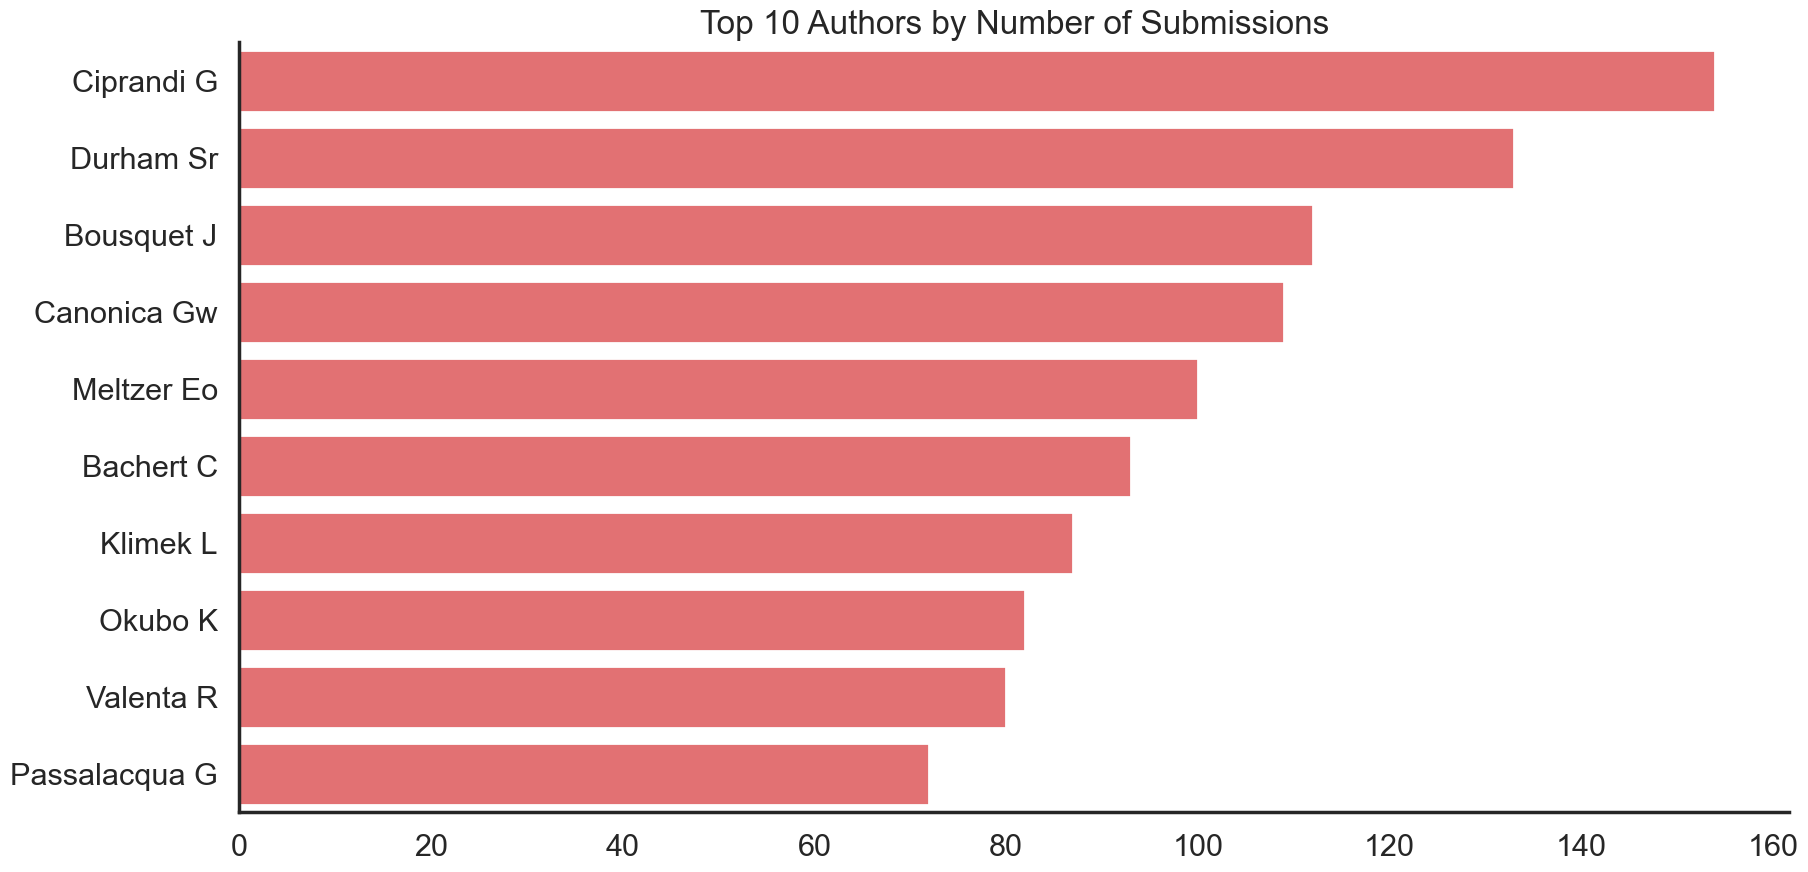

In [16]:
top10_plots(top10_authors, 'Top 10 Authors by Number of Submissions')

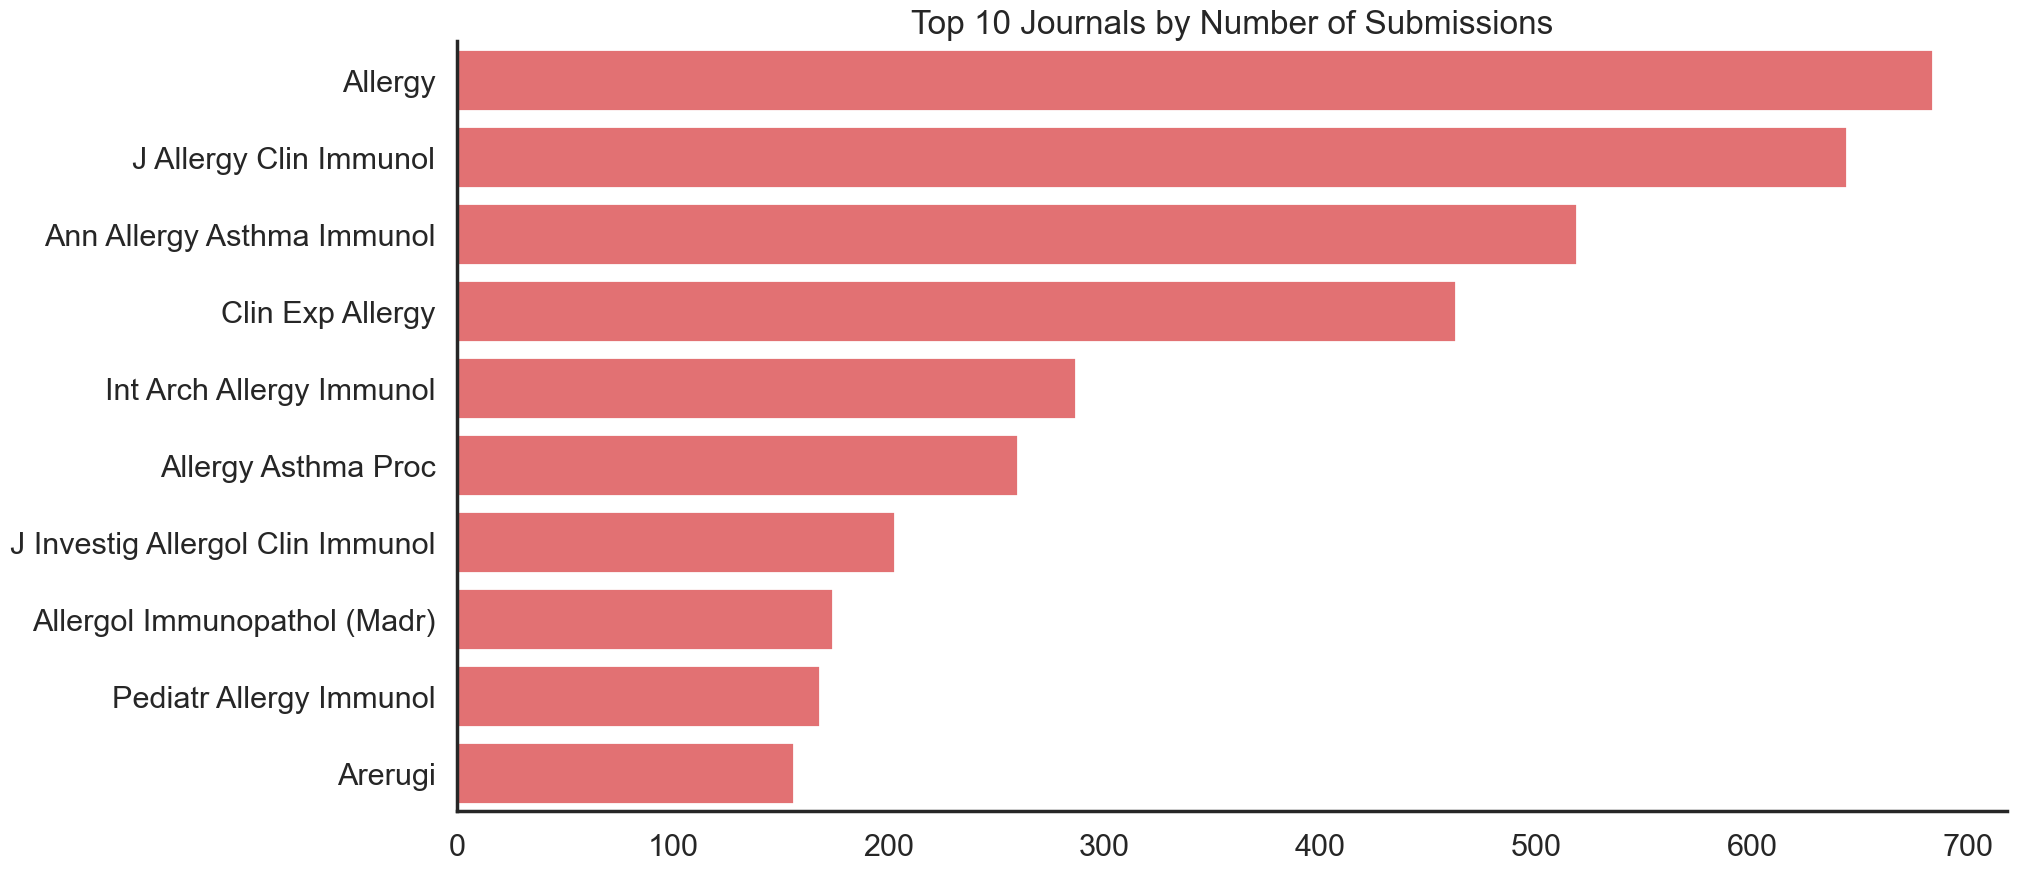

In [17]:
top10_plots(top10_journals, 'Top 10 Journals by Number of Submissions')

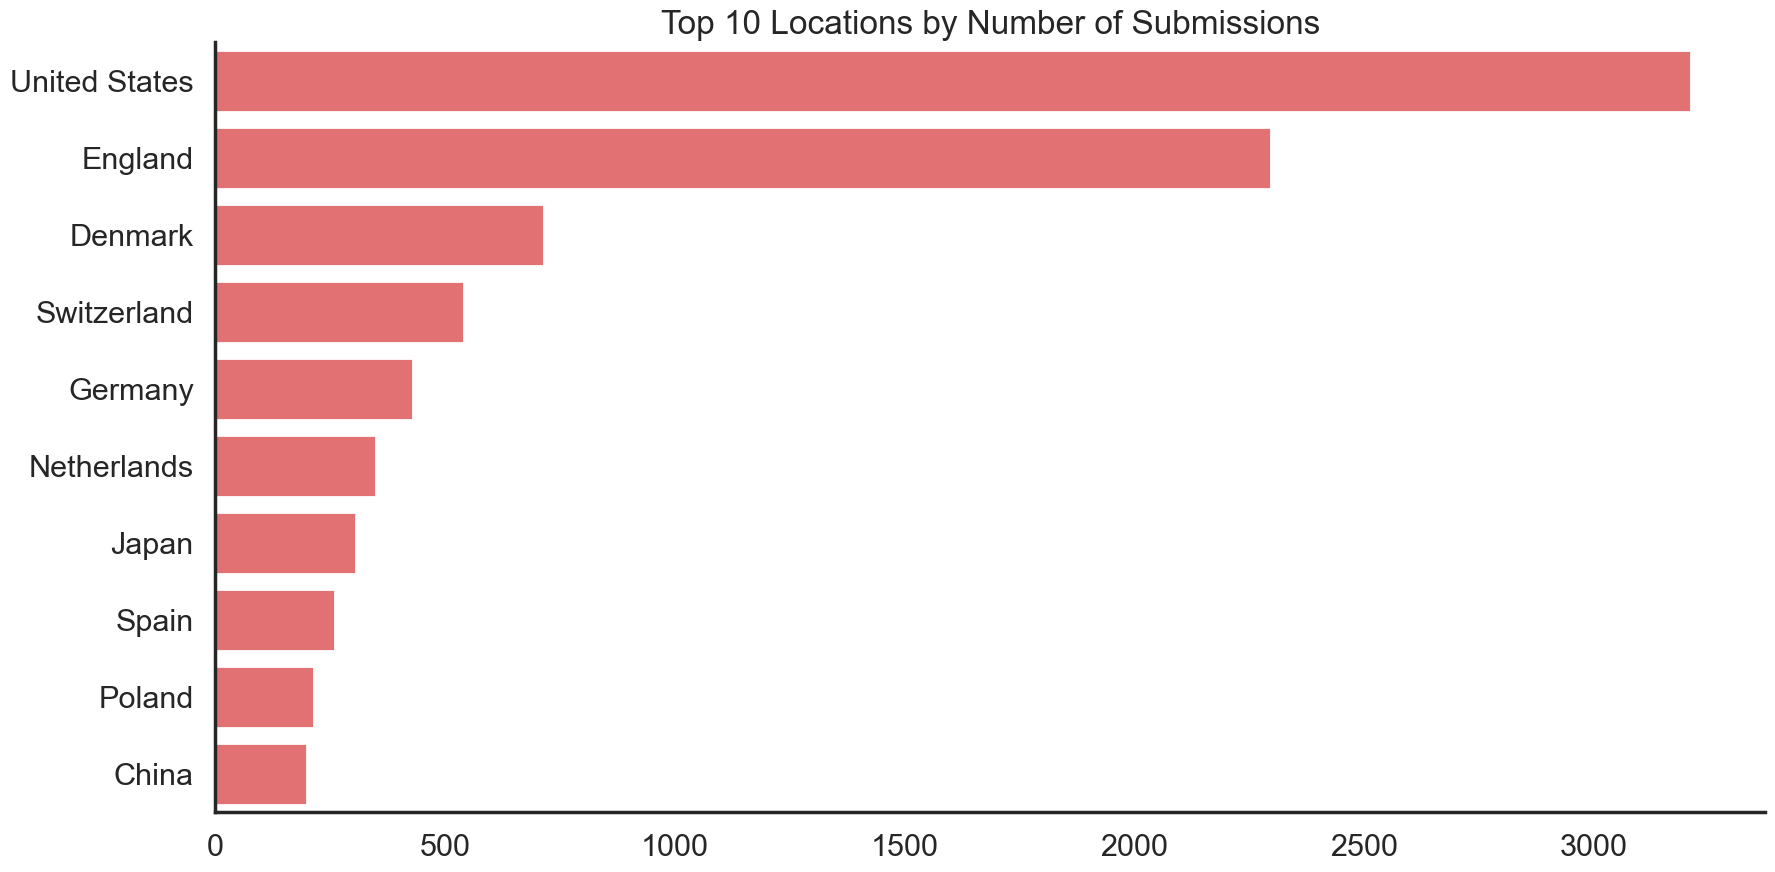

In [18]:
top10_plots(top10_locations, 'Top 10 Locations by Number of Submissions')

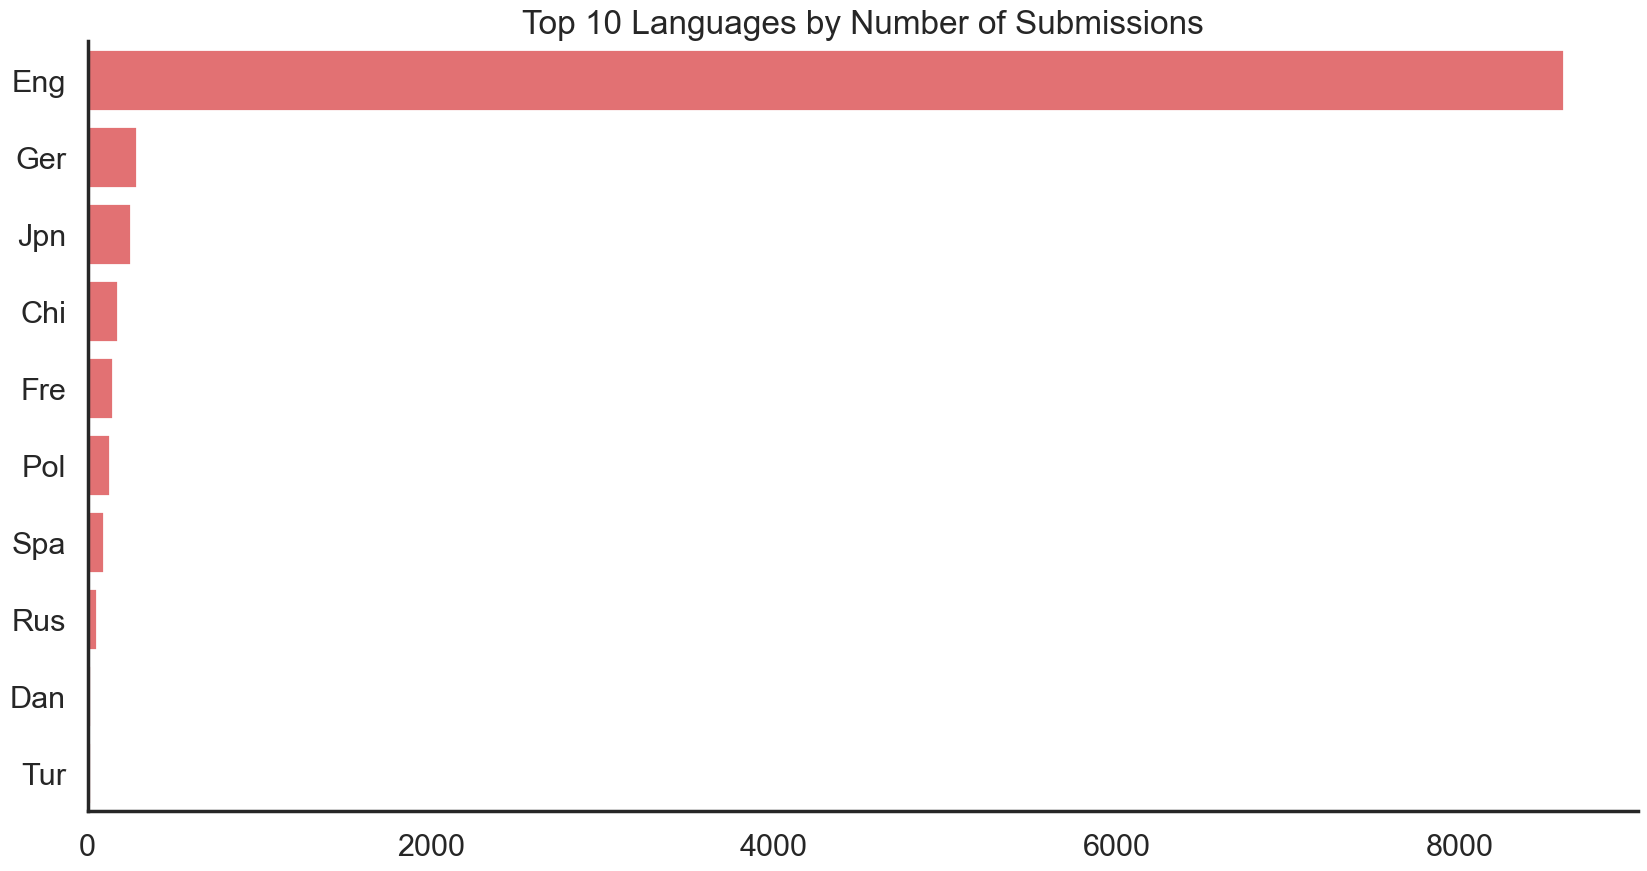

In [19]:
top10_plots(top10_languages, 'Top 10 Languages by Number of Submissions')

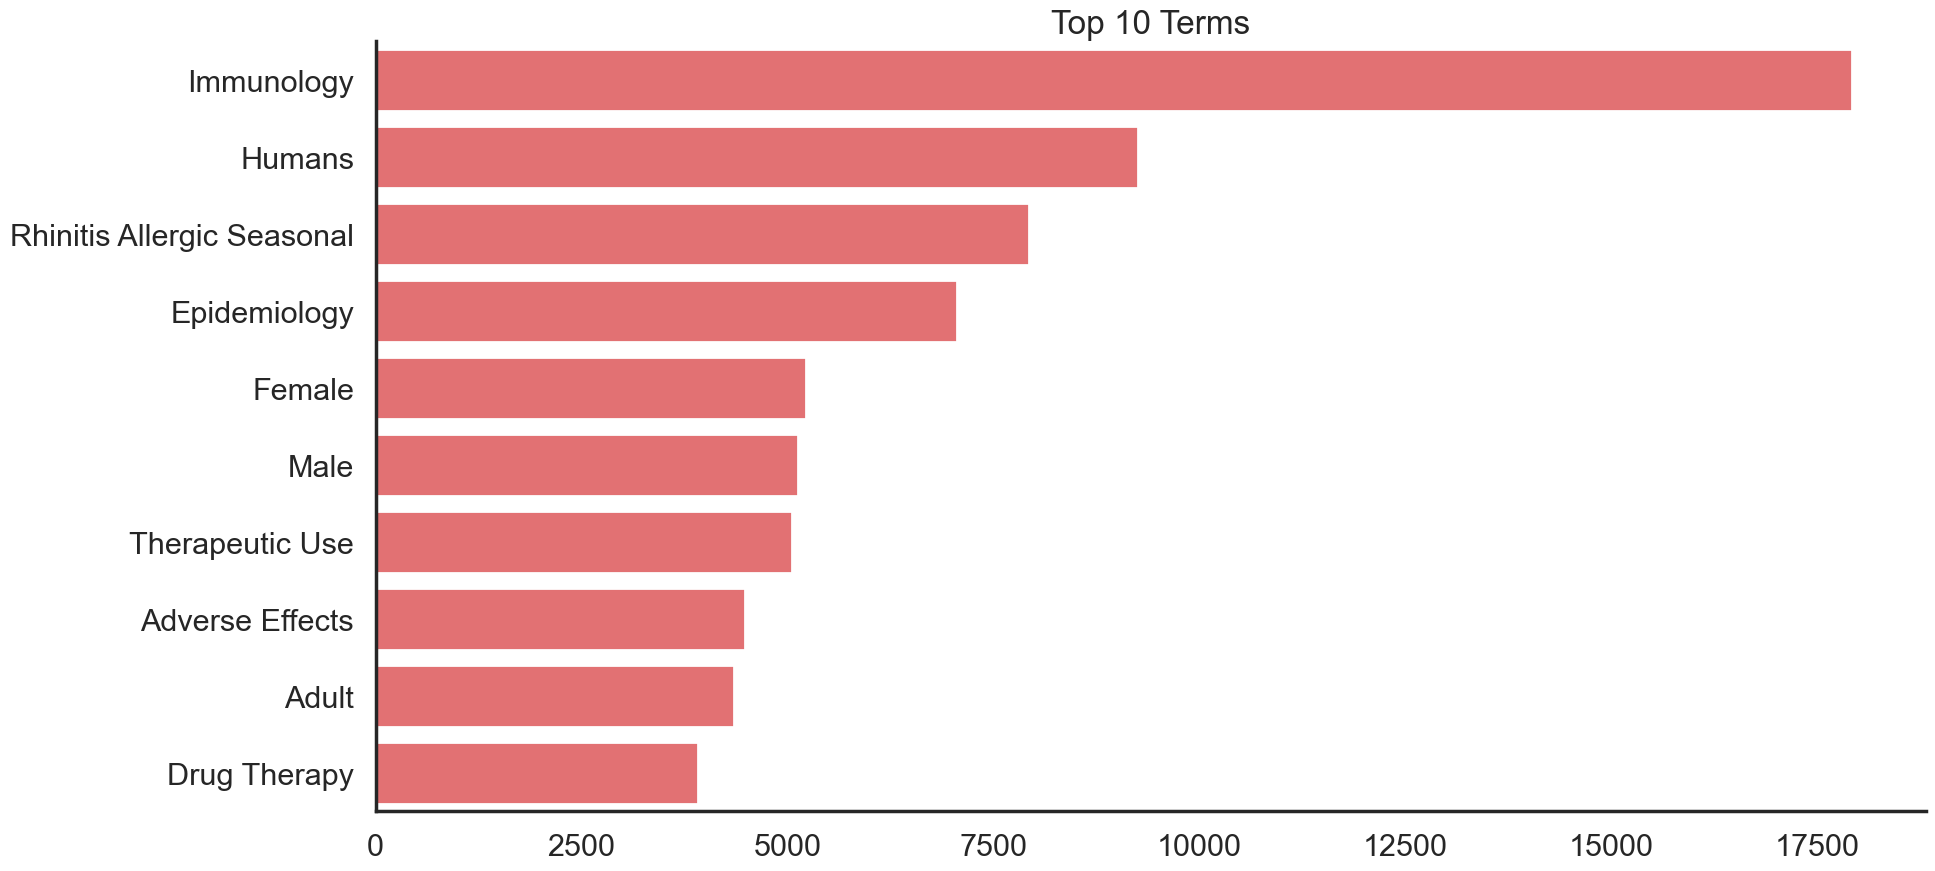

In [20]:
top10_plots(top10_terms, 'Top 10 Terms')

<Figure size 2000x1000 with 0 Axes>

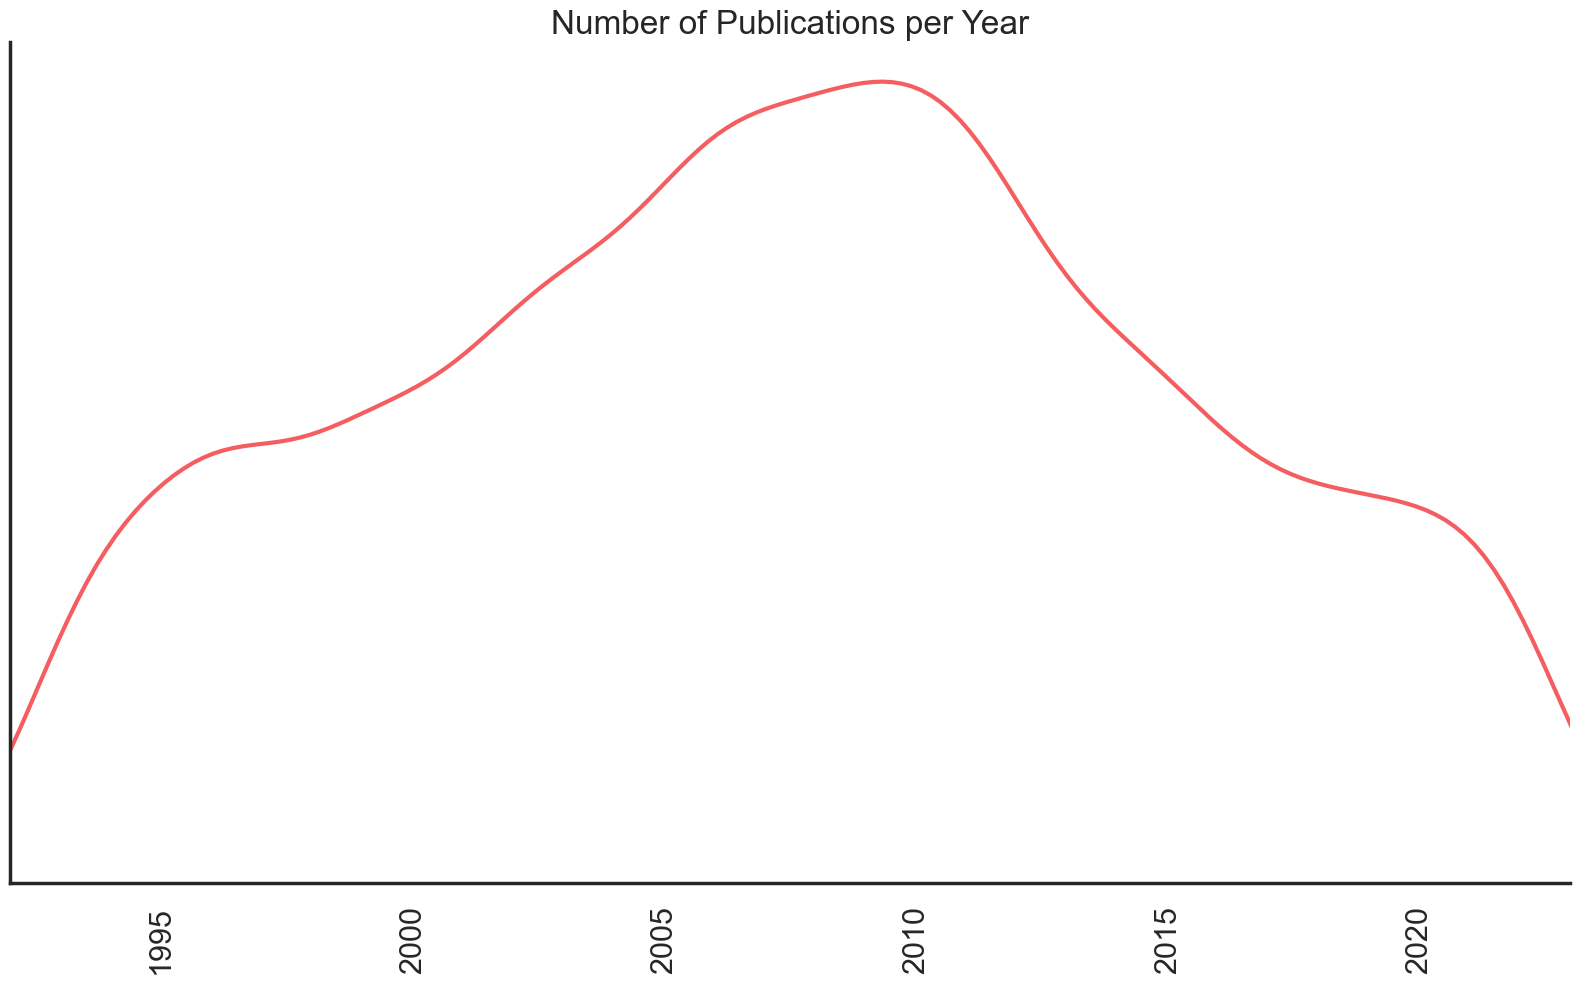

In [21]:
sns.set(context = 'poster', style = 'white')

x = df_clean['year'].sort_values(ascending = True)
xlabel = ''
ylabel = ''
yticks = ''
title = 'Number of Publications per Year'

plt.figure(figsize=(20,10))
ax = sns.displot(data = x, kind = 'kde', color = '#f55e61', aspect = 1.75, height = 10)
ax.set_xticklabels(rotation=90)
ax.set(xlabel = xlabel, yticklabels = yticks, ylabel = ylabel, xlim = (min(df_clean['year']), max(df_clean['year'])),
       title = title)

plt.show()

## 05 - Feature Preprocessing / Engineering<a id="5"></a>

In [22]:
df_f = df_clean[['title', 'authors', 'abstract', 'reference_number']].copy()
df_f.head()

,title,authors,abstract,reference_number
0,Clinical efficacy and safety of coseasonal ini...,feng_y cao_y liu_y wang_q he_c hao_j zhang_k h...,PURPOSE: Patients with seasonal allergic rhino...,-1.0
1,Efficacy of butterbur in allergic rhinitis: a ...,ozergin_coskun_z bayar_muluk_n turgut_cosan_d ...,OBJECTIVE: The study aims to define butterbur'...,-1.0
2,Twenty cases of perennial and seasonal allergi...,bouboulis_d huff_a burawski_l,BACKGROUND: Allergic rhinitis is the most comm...,-1.0
3,"From the archive: hay fever, and the transit o...",,,-1.0
4,Factors predicting the outcome of allergen-spe...,barreto_m tripodi_s arasi_s landi_m montesano_...,BACKGROUND: Nasal provocation testing (NPT) is...,-1.0


In [23]:
def get_wordnet_pos(treebank_tag):
    '''
    function takes in a string and assigns it a part of speech tag.
    Used for lemmatizing, no need to use elsewhere
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def abstract_clean(txt):
    '''
    function for cleaning the abstract column
    
    inputs:
    - a txt string
    
    outputs:
    - a txt string but cleaned up
    '''
    sw = stopwords.words('english')
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!#@'
    no_accents_re = re.compile('^[a-z]+$')
    num_re = re.compile('^\d+$')

    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing words with accents
    t = [w for w in t if no_accents_re.match(w)]
    # removing stop words
    t = [w for w in t if w not in sw]
    # removing empty strings
    t = [w for w in t if w]
    # word lemmatizing
    lemm = WordNetLemmatizer()
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    t = [lemm.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

In [24]:
df_f['ab_clean'] = df_f['abstract'].apply(abstract_clean)

In [25]:
cv = CountVectorizer()
cv_m = cv.fit_transform(df_f['ab_clean'])
df_cv = pd.DataFrame(data = cv_m.toarray(), columns = cv.get_feature_names_out())
df_cv['reference_number'] = df_f['reference_number']

df_cv_train = df_cv[df_cv['reference_number'] >= 0]
df_cv_test = df_cv[df_cv['reference_number'] < 0]

In [26]:
tfidf = TfidfVectorizer()
tfidf_m = tfidf.fit_transform(df_f['ab_clean'])
df_tfidf = pd.DataFrame(data = tfidf_m.toarray(), columns = tfidf.get_feature_names_out())
df_tfidf['reference_number'] = df_f['reference_number']

df_tfidf_train = df_tfidf[df_tfidf['reference_number'] >= 0]
df_tfidf_test = df_tfidf[df_tfidf['reference_number'] < 0]

## 06 - Reference Number Inputing w/ Supervised Regression Modeling<a id="6"></a>

In [27]:
X_cv = df_cv_train.drop(['reference_number'], axis = 1)
y_cv = df_cv_train['reference_number']

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, random_state = 42, test_size = 0.25)

In [28]:
X_tfidf = df_tfidf_train.drop(['reference_number'], axis = 1)
y_tfidf = df_tfidf_train['reference_number']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf
                                                                            , random_state = 42, test_size = 0.25)

In [29]:
def mpd_test(model, vectorizer):
    if vectorizer == 'cv':
        X_train = X_train_cv
        X_test = X_test_cv
        y_train = y_train_cv
        y_test = y_test_cv
    elif vectorizer == 'tfidf':
        X_train = X_train_tfidf
        X_test = X_test_tfidf
        y_train = y_train_tfidf
        y_test = y_test_tfidf
        
    train = mean_poisson_deviance(y_train, model.predict(X_train))
    test = mean_poisson_deviance(y_test, model.predict(X_test))
    
    return train,test

### 06a - Linear Regression

In [30]:
lr_cv = LinearRegression().fit(X_train_cv, y_train_cv)

In [31]:
lr_tfidf = LinearRegression().fit(X_train_tfidf, y_train_tfidf)

### 06b - Poisson Regression

In [32]:
pr_cv = PoissonRegressor().fit(X_train_cv, y_train_cv)

In [33]:
mpd_test(pr_cv, 'cv')

(12.930529229224996, 81.16002996416667)

In [34]:
pr_tfidf = PoissonRegressor().fit(X_train_tfidf, y_train_tfidf)

In [35]:
mpd_test(pr_tfidf, 'tfidf')

(31.74402058590531, 79.05894100480428)

### 06c - Decision Tree Regression

In [36]:
dtr_cv = DecisionTreeRegressor().fit(X_train_cv, y_train_cv)

In [37]:
dtr_tfidf = DecisionTreeRegressor().fit(X_train_tfidf, y_train_tfidf)

### 06d - Random Forest Regression

In [38]:
rfr_cv = RandomForestRegressor(random_state = 42).fit(X_train_cv, y_train_cv)

In [39]:
mpd_test(rfr_cv, 'cv')

(14.943236497942952, 80.00454304209133)

In [40]:
rfr_tfidf = RandomForestRegressor(random_state = 42).fit(X_train_tfidf, y_train_tfidf)

In [41]:
mpd_test(rfr_tfidf, 'tfidf')

(15.179316203023923, 79.37962517156357)

### 06e - Poisson Regression Optimization

In [42]:
# def mpd(y_true, y_pred):
#     return mean_poisson_deviance(y_true, y_pred)

# custom_scorer = make_scorer(mpd, greater_is_better = False)

# param_grid = {
#     'alpha':[0, 1, 10, 100],
#     'fit_intercept':[True, False],
#     'solver':['lbfgs', 'newton-cholesky'],
#     'warm_start':[True, False]
# }

# pr = PoissonRegressor()

# gs = GridSearchCV(pr, param_grid, scoring = custom_scorer)
# gs.fit(X_train_tfidf, y_train_tfidf)

In [43]:
# gs.best_estimator_ = PoissonRegressor(alpha = 1, fit_intercept = True, solver = 'lbfgs', warm_start = False)

In [44]:
pr_best = PoissonRegressor(alpha = 1, fit_intercept = True, solver = 'lbfgs', warm_start = False)

pr_best.fit(X_train_tfidf, y_train_tfidf)

mpd_test(pr_best, 'tfidf')

(31.74402058590531, 79.05894100480428)

### 06f - Reference Number Imputing

In [45]:
df_tfidf_test['reference_number'] = pr_best.predict(df_tfidf_test.drop(['reference_number'], axis = 1))

df_rf = df_tfidf_test.append(df_tfidf_train)

In [46]:
df_rf['reference_number'].describe()

count    9884.000000
mean       52.143184
std        28.574109
min         0.000000
25%        49.109151
50%        51.096227
75%        53.157154
max      2241.000000
Name: reference_number, dtype: float64

## 07 - Grouping Similar Documents w/ Unsupervised Clustering Modeling<a id="7"></a>

In [47]:
document_number = 10

X = df_rf.drop(columns = ['reference_number'], axis = 0)

cluster_number = int(X.shape[0]/10)

In [48]:
# kmeans = KMeans(n_clusters = cluster_number, random_state = 42, n_init = 'auto').fit(X)

In [49]:
km = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(X)

In [50]:
print(silhouette_score(X, km.labels_))

0.0321271397588191


### 07a - Scaling 

In [51]:
df_s = StandardScaler().fit_transform(df_rf.drop(columns = ['reference_number'], axis = 0))

In [52]:
km_s = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_s)

In [53]:
print(silhouette_score(df_s, km_s.labels_))

0.010487888976740158


### 07b - Normalizing

In [54]:
df_n = normalize(df_rf.drop(columns = ['reference_number'], axis = 0))

In [55]:
km_n = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_n)

In [56]:
print(silhouette_score(df_n, km_n.labels_))

0.0321271397588191


### 07c - Normalizing then Scaling

In [57]:
df_ns = StandardScaler().fit_transform(df_n)

In [58]:
km_ns = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_ns)

In [59]:
print(silhouette_score(df_ns, km_ns.labels_))

0.01048788897674014


### 07d - Scaling then Normalizing

In [60]:
df_sn = normalize(df_s)

In [61]:
km_sn = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_sn)

In [62]:
print(silhouette_score(df_sn, km_sn.labels_))

0.14481980692217222


### 07e - SVD

In [63]:
svd = TruncatedSVD(n_components = 2, n_iter = 7, random_state = 42)

In [64]:
df_svd = svd.fit_transform(df_sn)

In [65]:
km_svd = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_svd)

In [66]:
print(silhouette_score(df_svd, km_svd.labels_))

0.40995194555119563


### 07f - SVD w/ 10 Components

In [67]:
svd = TruncatedSVD(n_components = 10, n_iter = 7, random_state = 42)

In [68]:
df_svd = svd.fit_transform(df_sn)

In [69]:
km_svd = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_svd)

In [70]:
print(silhouette_score(df_svd, km_svd.labels_))

0.29825249153339584


### 07g - SVD w/ 5 Components

In [71]:
svd = TruncatedSVD(n_components = 5, n_iter = 7, random_state = 42)

In [72]:
df_svd = svd.fit_transform(df_sn)

In [73]:
km_svd = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_svd)

In [74]:
print(silhouette_score(df_svd, km_svd.labels_))

0.33457028688890733


### 07h - Hierarchical Clustering

In [75]:
hc = AgglomerativeClustering(n_clusters = document_number).fit(df_svd)

In [76]:
print(silhouette_score(df_svd, hc.labels_))

0.29120599263136093


### 07h - Final 

In [77]:
df_s = StandardScaler().fit_transform(df_rf.drop(columns = ['reference_number'], axis = 0))
df_sn = normalize(df_s)
df_svd = TruncatedSVD(n_components = 2, n_iter = 7, random_state = 42).fit_transform(df_sn)
km_svd = KMeans(n_clusters = document_number, random_state = 42, n_init = 'auto').fit(df_svd)
print(silhouette_score(df_svd, km_svd.labels_))

0.40995194555119563


In [78]:
df_rf['labels'] = km_svd.labels_

## 08 - Finding Results to Return<a id="8"></a>

In [79]:
idx = []

for i in range(document_number):
    idx.append(df_rf[df_rf['labels'] == i]['reference_number'].idxmax())


## 09 - Example Showcase<a id="9"></a>

In [80]:
for i in df_f.iloc[idx]['title']:
    print(i)

[Epidemiology of respiratory allergies: current data].
Allergic Rhinitis and its Impact on Asthma (ARIA) 2008 update (in collaboration with the World Health Organization, GA(2)LEN and AllerGen).
Intranasal corticosteroids for allergic rhinitis: superior relief?
Allergic rhinitis and its pharmacology.
Intranasal fluticasone propionate. A reappraisal of its pharmacology and clinical efficacy in the treatment of rhinitis.
Safety and tolerability profiles of intranasal antihistamines and intranasal corticosteroids in the treatment of allergic rhinitis.
Pharmacologic rationale for treating allergic and nonallergic rhinitis.
Intranasal azelastine. A review of its efficacy in the management of allergic rhinitis.
The bidirectional capacity of bacterial antigens to modulate allergy and asthma.
Cysteinyl-leukotrienes and their receptors in asthma and other inflammatory diseases: critical update and emerging trends.
